<a href="https://colab.research.google.com/github/elangbijak4/Quantum_Algorithm_Almudaya/blob/main/Embedding_Space_to_Hilbert_Space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

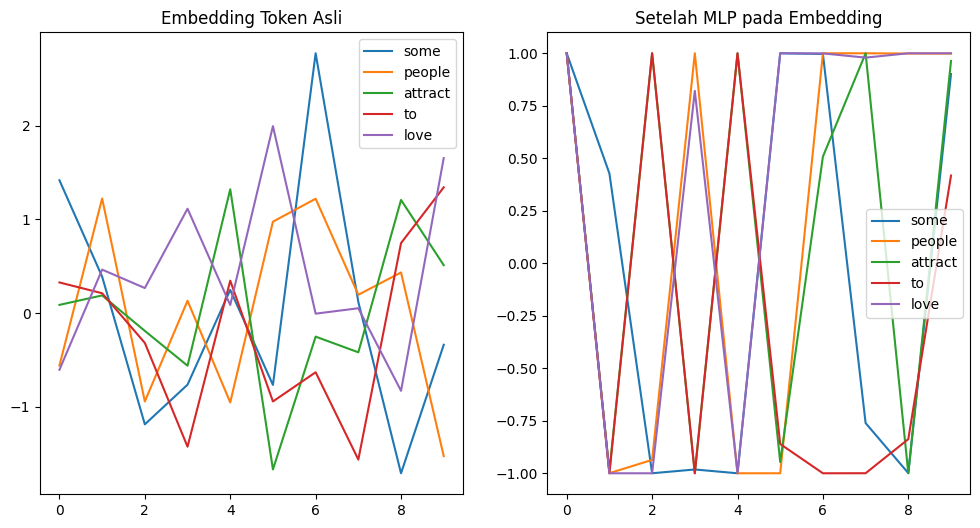

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Fungsi untuk membuat embedding token secara sederhana
def generate_token_embeddings(tokens, embedding_dim):
    encoder = LabelEncoder()
    encoded_tokens = encoder.fit_transform(tokens)
    embeddings = np.random.randn(len(tokens), embedding_dim)  # Random embedding
    return embeddings, encoder

# Fungsi self-attention berbasis dot product untuk token embedding
def embedding_attention(embeddings):
    attention_scores = np.dot(embeddings, embeddings.T)
    attention_matrix = np.exp(attention_scores)  # Simple softmax-like function
    attention_matrix = attention_matrix / np.sum(attention_matrix, axis=1, keepdims=True)
    return attention_matrix

# Teks input: "some people attract to love"
tokens = ["some", "people", "attract", "to", "love"]

# Simulasi sederhana: token direpresentasikan sebagai embedding vektor
embedding_dim = 10  # Dimensi vektor embedding
token_embeddings, encoder = generate_token_embeddings(tokens, embedding_dim)

# Menghitung self-attention untuk embedding
attention_matrix = embedding_attention(token_embeddings)

# Terapkan attention ke embedding (weighted sum)
new_embeddings = np.dot(attention_matrix, token_embeddings)

# Definisikan MLP untuk diterapkan pada embedding
class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.W1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.random.randn(hidden_dim)
        self.W2 = np.random.randn(hidden_dim, output_dim)
        self.b2 = np.random.randn(output_dim)

    def forward(self, x):
        z1 = np.dot(x, self.W1) + self.b1  # Lapisan pertama (Linear)
        a1 = np.tanh(z1)  # Aktivasi nonlinear tanh
        z2 = np.dot(a1, self.W2) + self.b2  # Lapisan kedua (Linear)
        return np.tanh(z2)  # Aktivasi nonlinear di akhir

# Terapkan MLP pada setiap embedding
mlp = MLP(input_dim=embedding_dim, hidden_dim=128, output_dim=embedding_dim)
transformed_embeddings = np.array([mlp.forward(embed) for embed in new_embeddings])

# Visualisasi embedding sebelum dan sesudah MLP
plt.figure(figsize=(12, 6))

# Visualisasi embedding asli
plt.subplot(1, 2, 1)
for i, token in enumerate(tokens):
    plt.plot(token_embeddings[i], label=token)
plt.title("Embedding Token Asli")
plt.legend()

# Visualisasi embedding setelah MLP
plt.subplot(1, 2, 2)
for i, token in enumerate(tokens):
    plt.plot(transformed_embeddings[i], label=token)
plt.title("Setelah MLP pada Embedding")
plt.legend()

plt.show()

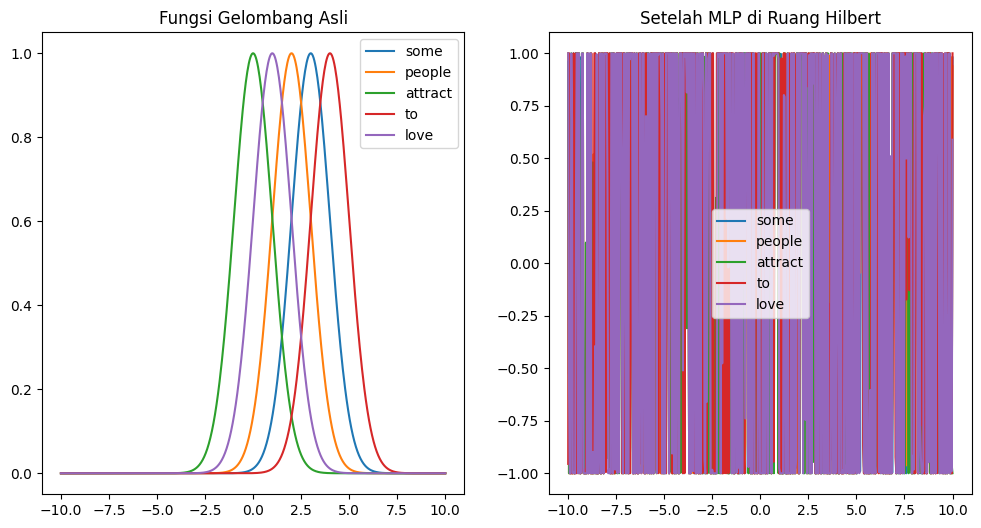

In [ ]:
# Menggunakan kode ruang Hilbert yang telah dijelaskan sebelumnya
# Representasi fungsi gelombang untuk teks
x_range = np.linspace(-10, 10, 500)
wave_functions, encoder = generate_token_wave_functions(tokens, x_range)

# Menghitung attention di ruang Hilbert
attention_matrix_hilbert = hilbert_attention(wave_functions)

# Terapkan attention ke fungsi gelombang (weighted sum)
new_wave_functions = np.dot(attention_matrix_hilbert, wave_functions)

# Terapkan MLP pada setiap fungsi gelombang
mlp_hilbert = MLP(input_dim=len(x_range), hidden_dim=128, output_dim=len(x_range))
transformed_wave_functions = np.array([mlp_hilbert.forward(wf) for wf in new_wave_functions])

# Visualisasi hasil
plt.figure(figsize=(12, 6))

# Visualisasi fungsi gelombang asli
plt.subplot(1, 2, 1)
for i, token in enumerate(tokens):
    plt.plot(x_range, wave_functions[i], label=token)
plt.title("Fungsi Gelombang Asli")
plt.legend()

# Visualisasi setelah MLP di ruang Hilbert
plt.subplot(1, 2, 2)
for i, token in enumerate(tokens):
    plt.plot(x_range, transformed_wave_functions[i], label=token)
plt.title("Setelah MLP di Ruang Hilbert")
plt.legend()

plt.show()